In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from skimage import io
import pandas as pd
from skimage.exposure import equalize_adapthist
from skimage.exposure import equalize_hist
from scipy.signal import find_peaks
from skimage.exposure import rescale_intensity

In [2]:
sys.path.insert(0, '/Users/shrilakshmisbonageri/Desktop/UW/DIRECT/capstone/musical-robot/musicalrobot')

In [5]:
frames = io.imread('/Users/studentuser/Downloads/ChCl_CA_DES_96_5_17_19.tiff')

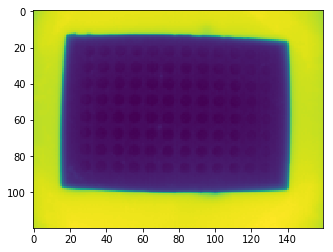

In [6]:
plt.imshow(frames[1])

In [7]:
frames.shape

(3077, 120, 160)

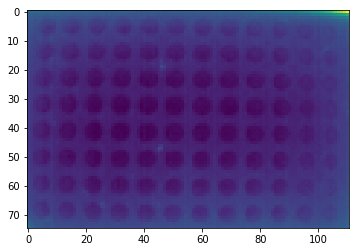

In [8]:
plt.imshow(frames[1][17:92,24:135])

In [9]:
frames = frames[0:len(frames),17:92,24:135]

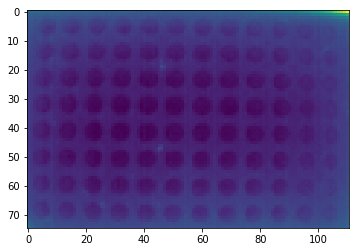

In [10]:
plt.imshow(frames[1])

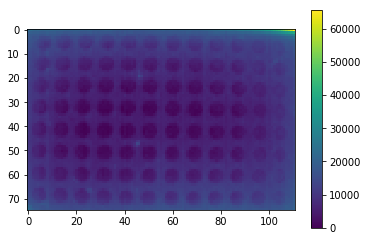

In [11]:
plt.imshow(rescale_intensity(frames[1]))
plt.colorbar()

### Adding all the images in the frame to get a better contrast and reduce noise

In [12]:
for II in range(frames.shape[0]):
    frame = rescale_intensity(frames[II])
    img_eq = (frame - np.amin(frame))/(np.amax(frame)-np.amin(frame))
    if II == 0:
        img_ave = img_eq
    else:
        img_ave = img_ave + img_eq
img_average = img_ave/frames.shape[0]
img_eq = (img_average - np.amin(img_average))/(np.amax(img_average)-np.amin(img_average))

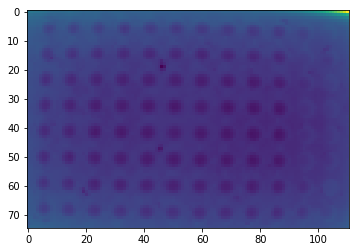

In [13]:
plt.imshow(img_eq)

In [14]:
rows = img_eq.shape[0]
columns = img_eq.shape[1]

In [15]:
column_sum = []
for i in range(0,columns):
    column_sum.append(sum(img_eq[:,i]))
row_sum = []
for j in range(0,rows):
    row_sum.append(sum(img_eq[j,:]))

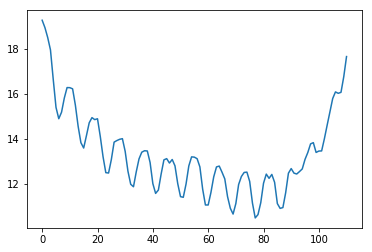

In [16]:
plt.plot(np.arange(len(column_sum)),column_sum)

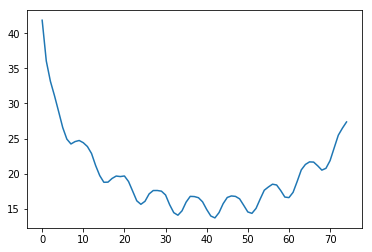

In [17]:
plt.plot(np.arange(len(row_sum)),row_sum)

In [18]:
column_sum = [x * -1 for x in column_sum]
row_sum = [x * -1 for x in row_sum]

In [19]:
column_troughs = find_peaks(column_sum, distance = 7)
column_troughs = column_troughs[0]
row_troughs = find_peaks(row_sum, distance = 8)
row_troughs = row_troughs[0]

In [20]:
print(column_troughs)
print(row_troughs)

[  6  15  24  33  41  51  60  69  77  86  99 107]
[ 7 15 24 33 42 51 60 68]


In [21]:
X = []
Y = []
i = 0
j = 0
for i in range(0,8):
    for j in range(0,12):
        X.append(column_troughs[j])
        j = j + 1
        Y.append(row_troughs[i])
    i = i + 1

In [22]:
well_location = pd.DataFrame(list(zip(X, Y)),columns =['X', 'Y'])

In [23]:
# To easily access the X and Y coordinates
x = well_location['X']
y = well_location['Y']
well_location

,X,Y
0,6,7
1,15,7
2,24,7
3,33,7
4,41,7
5,51,7
6,60,7
7,69,7
8,77,7
9,86,7


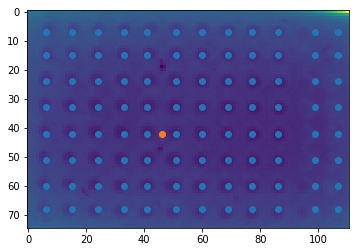

In [24]:
plt.imshow(img_eq)
plt.scatter(x,y)
plate_x = x[4] + 5
plate_y = y[48]
plt.scatter(plate_x,plate_y)

### Finding pixel intensity in all the wells in each frame

In [25]:
# List to store lists of temperature at all the well in each frame.
temp = []
for i in range(96):
    # List to store temperature at a well in each frame.
    comp_temp = []
    for frame in frames:
        comp_temp.append(frame[y[i]][x[i]])
    temp.append(comp_temp)

In [26]:
# Temperature at each of 96 well plates can be accessed
# using the well plate number as the list index
len(temp)
# The length of the list gives the number of wells at which
# temperature is observed over a period of time.

96

In [27]:
# Each list in the list 'temp' gives the temperature
# at the required well in each frame
len(temp[1])

3077

In [28]:
plate_temp = []
for frame in frames:
    plate_temp.append(frame[plate_y,plate_x])

### Plotting

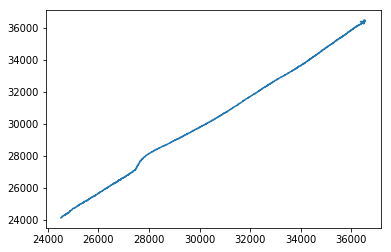

In [43]:
plt.plot(temp[0], plate_temp)

### attempting to find the inflection point

In [57]:
len(temp[0])
len(plate_temp)
#plt.axvline(np.gradient(arr[:365]).argmax())
well_1=np.asarray([temp[0],plate_temp])
well_1.dtype

dtype('uint16')

In [54]:
inflection_point_1 = np.diff(well_1).argmin()
inflection_point_2 = np.diff(well_1).argmax()
print(inflection_point_1, inflection_point_2)

0 1317


In [59]:
temp[0][1317]

31782

The inflection point found from the code does not match what is visually seen on the graph, it is closer to 27000cK

### plotting the data for all 96 wells

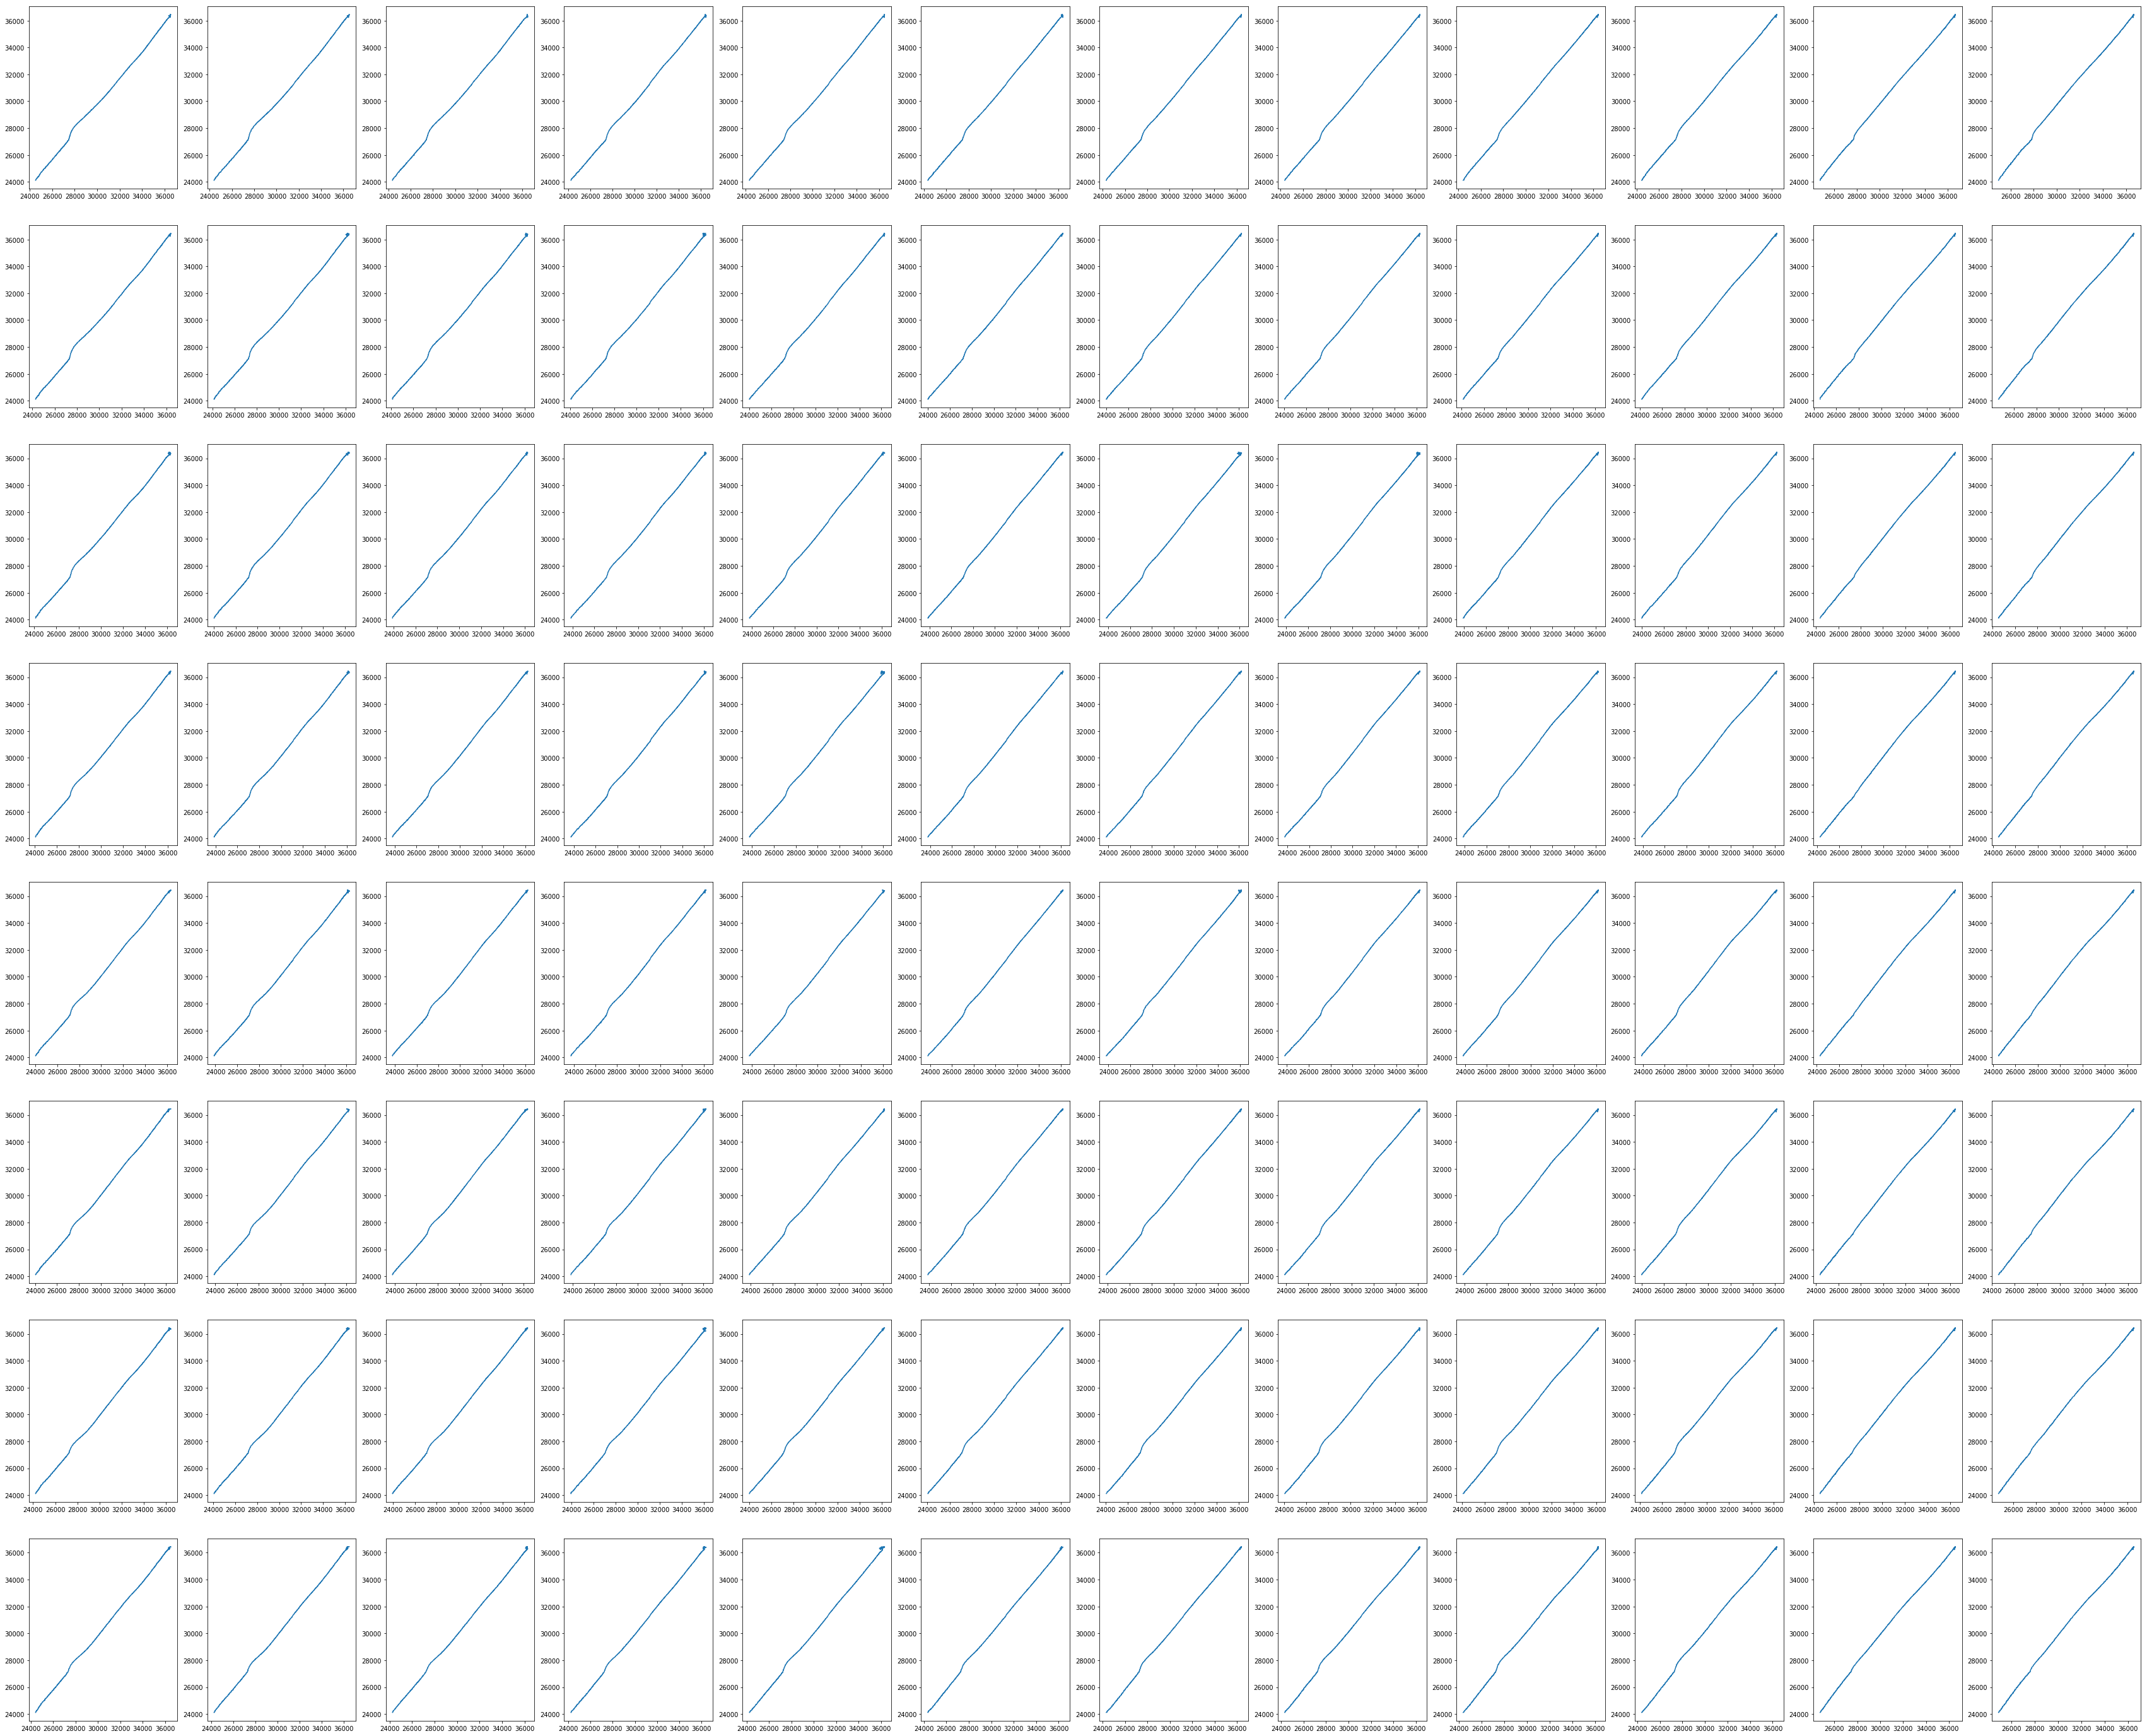

In [66]:
fig = plt.figure(figsize = (60,50))
columns = 12
rows = 8

for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.plot(temp[i-1], plate_temp)
plt.show()

While some inflection points are clearer for certain wells, they are all around the same value which is strange.